In [4]:
from matplotlib import pyplot as plt
import numpy as np
import pandas

> I suspect that during the data collection process I didn't check the role of the tracker and it gets assigned with a role other than hand-held?

In [26]:
flat_frame = pandas.read_csv("data/optical_flow_dat/aggregate_data_20221121-001125(flat).csv")
flat_frame

,Unnamed: 0,dts,pwm3901_vx,pwm3901_vy,openvr_vx,openvr_vy,openvr_vz,openvr_v_angx,openvr_v_angy,openvr_v_angz
0,0,0.003848,0.000000,0.000000,0.633154,-0.272498,0.310823,-0.215159,-0.042892,-0.110643
1,1,0.204458,0.000000,0.000000,0.747166,-0.378270,0.327756,-0.682509,0.073600,-0.289447
2,2,0.405198,0.000000,0.000000,0.178980,-0.075715,0.133074,-0.380408,0.124947,-0.084724
3,3,0.605849,0.000000,0.000000,0.094906,-0.166927,-0.022541,-0.526663,0.204515,0.012860
4,4,0.806418,0.000000,0.000000,0.052284,-0.129441,0.007932,-0.084257,0.651170,0.122270
...,...,...,...,...,...,...,...,...,...,...
177,177,35.514267,-122.347019,-26.823117,0.186537,0.057410,-0.473587,-0.158223,-0.501509,-0.360953
178,178,35.714855,-115.160800,-19.381740,0.020891,0.084279,-0.374130,0.044196,-0.558233,0.284453
179,179,35.915776,-0.992524,57.481826,-0.106779,0.064806,-0.163939,0.276210,-0.641910,-0.082549
180,180,36.116413,-73.275225,17.296637,-0.046599,-0.076513,-0.163342,-0.152418,-0.124985,-0.003011


In [33]:
pwm3901_vx_stacked_mat = np.stack((
    flat_frame['pwm3901_vx'],
    flat_frame['openvr_vx'],
    flat_frame['openvr_vy'],
    flat_frame['openvr_vz']
),axis=0)

pwm3901_vy_stacked_mat = np.stack((
    flat_frame['pwm3901_vy'],
    flat_frame['openvr_vx'],
    flat_frame['openvr_vy'],
    flat_frame['openvr_vz']
),axis=0)

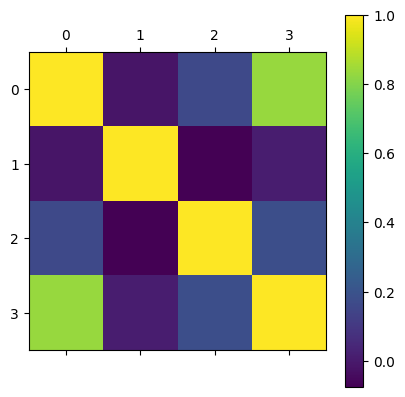

array([[ 1.        , -0.01514606,  0.16121246,  0.83373737],
       [-0.01514606,  1.        , -0.07624321,  0.01079694],
       [ 0.16121246, -0.07624321,  1.        ,  0.18159368],
       [ 0.83373737,  0.01079694,  0.18159368,  1.        ]])

In [34]:
pwm3901_vx_corrcoeff = np.corrcoef(pwm3901_vx_stacked_mat,rowvar=True)
plt.matshow(pwm3901_vx_corrcoeff)
plt.colorbar()
plt.show()

pwm3901_vx_corrcoeff

> Looks like $v_x$ in pwm3901 is strongly correlated with $v_z$ in openvr => if hand-held role it would be the $v_y$

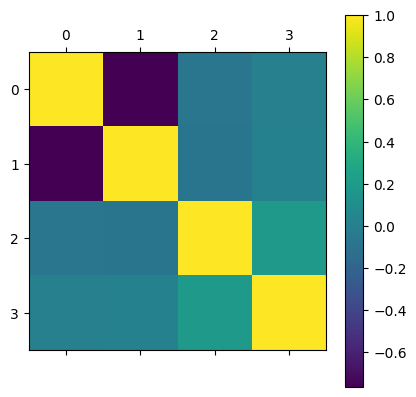

array([[ 1.        , -0.76394694, -0.07388549,  0.00476006],
       [-0.76394694,  1.        , -0.07624321,  0.01079694],
       [-0.07388549, -0.07624321,  1.        ,  0.18159368],
       [ 0.00476006,  0.01079694,  0.18159368,  1.        ]])

In [35]:
pwm3901_vy_corrcoeff = np.corrcoef(pwm3901_vy_stacked_mat,rowvar=True)
plt.matshow(pwm3901_vy_corrcoeff)
plt.colorbar()
plt.show()

pwm3901_vy_corrcoeff

> Looks like $v_y$ in pwm3901 is strongly correlated with $-v_x$ in openvr => if hand-held role it would be the $v_x$

Now let's find some multiplication factors!

In [36]:
x_idx = flat_frame['pwm3901_vx']!=0
x_multiplier = flat_frame['openvr_vz'].std() / flat_frame['pwm3901_vx'].std()
print('x_multiplier', x_multiplier)

x_multiplier 0.0026329346794752443


In [41]:
y_idx = flat_frame['pwm3901_vy']!=0
y_multiplier = -flat_frame['openvr_vx'].std() / flat_frame['pwm3901_vy'].std()
print('y_multiplier', y_multiplier)

y_multiplier -0.0027027605187676393


In [43]:
real_multiplier = (x_multiplier - y_multiplier) / 2
real_multiplier

0.002667847599121442